In [1]:
import time
import polars as pl
import matplotlib.pyplot as plt
import beaver

In [2]:
csv_path = "/home/plouc314/Documents/epfl/ma1/shs/project/data/csv"
n_year = 10
dfs = []

for year in range(n_year):
    year += 1835
    df = pl.read_csv(f"{csv_path}/{year}.csv")
    dfs.append(df)

df1 = dfs[0]
df2 = dfs[1]
df3 = dfs[2]

In [29]:
n_run = 1000

st = time.perf_counter()
r = beaver.benchmark_distance_functions(
    df1["nom_rue_norm"],
    "alexandre",
    num_runs=n_run,
    distance_function="lv_opti",
)
d = time.perf_counter() - st
print(d)


0.40056646800076123Grapheme cluster larger than 8 bytes: 👨‍👩‍👦



In [3]:
def benchmark_dist_comp_pass(
    values1: pl.Series,
    values2: pl.Series,
    cache_dist_threshold: int,
    num_runs: int=1,
    distance_function: str="lv_opti",
) -> tuple[float, float, int]:
    
    r = beaver.benchmark_feature_distance_calculator(
        values1,
        values2,
        num_runs=num_runs,
        cache_dist_threshold=cache_dist_threshold,
        distance_function=distance_function,
    )
    ns, comp, cache_hit, cache_size, _ = r
    duration = ns / 1_000_000_000
    cache_hit_ratio = cache_hit / comp

    return duration, cache_hit_ratio, cache_size

In [4]:
col = "chef_prenom_norm"

n_run = 1
cache_dist_threshold = 4

r = beaver.benchmark_feature_distance_calculator(
    df1[col],
    df2[col],
    num_runs=n_run,
    cache_dist_threshold=cache_dist_threshold,
    distance_function="lv_opti",
)
ns, comp, cache_hit, cache_size, _ = r

duration = ns / 1_000_000_000
cache_hit_ratio = cache_hit / comp

print(f"{duration} sec {cache_hit_ratio*100:.2f}% cache hit cache size: {cache_size}")

1.22555581 sec 91.01% cache hit cache size: 276665


In [5]:
thresholds = [128, 64, 32, 16, 8, 4, 2, 1]

vs1 = df1[col]
vs2 = df2[col]
durations = []
cache_hit_ratios = []
cache_sizes = []

for threshold in thresholds:
    duration, cache_hit_ratio, cache_size = benchmark_dist_comp_pass(vs1, vs2, threshold)
    durations.append(duration)
    cache_hit_ratios.append(cache_hit_ratio)
    cache_sizes.append(cache_size)


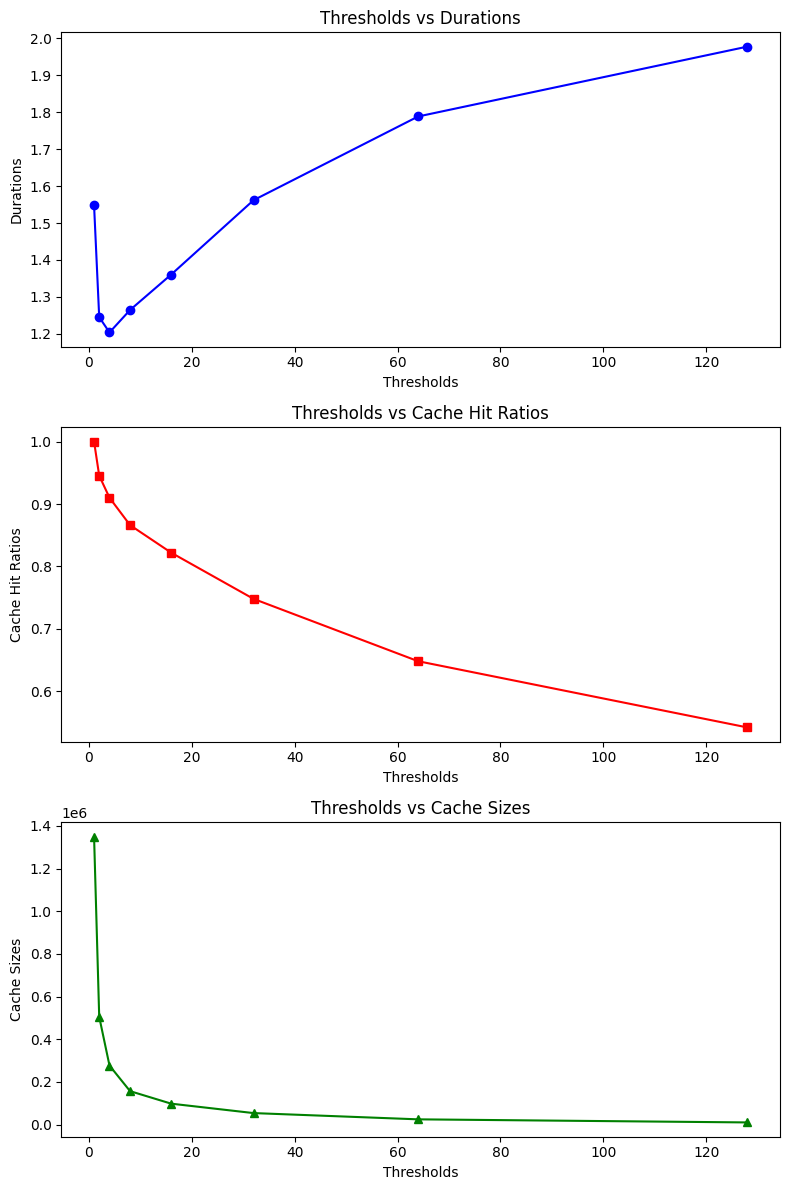

In [6]:
# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Plot each metric against thresholds
axes[0].plot(thresholds, durations, marker='o', linestyle='-', color='b')
axes[0].set_title('Thresholds vs Durations')
axes[0].set_xlabel('Thresholds')
axes[0].set_ylabel('Durations')

axes[1].plot(thresholds, cache_hit_ratios, marker='s', linestyle='-', color='r')
axes[1].set_title('Thresholds vs Cache Hit Ratios')
axes[1].set_xlabel('Thresholds')
axes[1].set_ylabel('Cache Hit Ratios')

axes[2].plot(thresholds, cache_sizes, marker='^', linestyle='-', color='g')
axes[2].set_title('Thresholds vs Cache Sizes')
axes[2].set_xlabel('Thresholds')
axes[2].set_ylabel('Cache Sizes')


plt.tight_layout()
plt.show()

In [7]:
n_run = 1
cache_dist_threshold = 4

r = beaver.benchmark_feature_distance_calculator_second_pass(
    df1[col],
    df2[col],
    df3[col],
    num_runs=n_run,
    cache_dist_threshold=cache_dist_threshold,
    distance_function="lv_opti",
)
ns, comp, cache_hit, cache_size, _ = r

duration = ns / 1_000_000_000
cache_hit_ratio = cache_hit / comp

print(f"{duration} sec {cache_hit_ratio*100:.2f}% cache hit cache size: {cache_size}")

2.636371496 sec 91.92% cache hit cache size: 227306


In [9]:
n_run = 1
cache_dist_threshold = 4

rs, _ = beaver.benchmark_feature_distance_calculator_multi_pass(
    [df[col] for df in dfs],
    num_runs=n_run,
    cache_dist_threshold=cache_dist_threshold,
    distance_function="lv_opti",
)
for r in rs:
    ns, comp, cache_hit, cache_size = r

    duration = ns / 1_000_000_000
    cache_hit_ratio = cache_hit / comp

    print(f"{duration} sec {cache_hit_ratio*100:.2f}% cache hit cache size: {cache_size}")

1.749239399 sec 91.13% cache hit cache size: 208396
1.983138708 sec 91.58% cache hit cache size: 353887
1.950321577 sec 91.60% cache hit cache size: 477329
1.989217488 sec 91.63% cache hit cache size: 599362
2.092741912 sec 91.61% cache hit cache size: 731213
1.916948759 sec 91.63% cache hit cache size: 854604
1.921923486 sec 91.65% cache hit cache size: 991752
2.113984554 sec 91.49% cache hit cache size: 1124546
2.423158837 sec 91.13% cache hit cache size: 1269308
